Assignment 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('mnist_test.csv')
train = pd.read_csv('mnist_train.csv')

In [3]:
x_train = train.drop('label', axis=1)
x_train = x_train.T
x_train = x_train/255
y_train = train.label
 
x_test = test.drop('label',axis=1)
x_test = x_test.T
y_test = test.label
print(x_train)
print(y_train)

       0      1      2      3      4      5      6      7      8      9      \
1x1      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x2      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x3      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x4      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1x5      0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
28x24    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x26    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
28x28    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  59990  59991  59992  59993  59994  5999

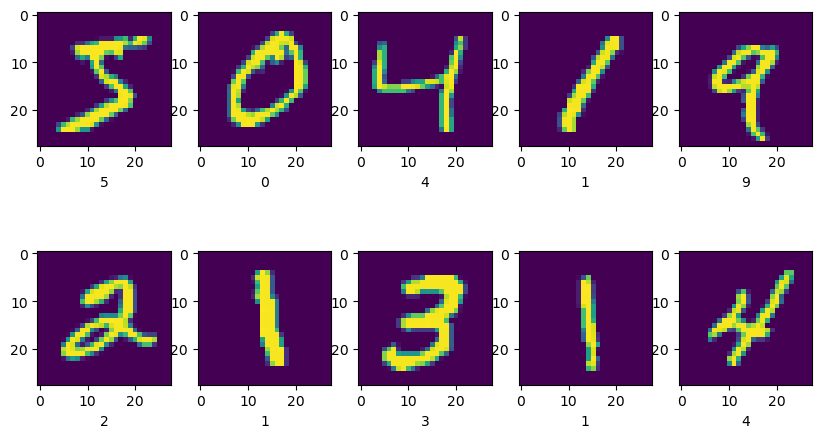

In [4]:
X_train_reshaped = x_train.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(10, 15))
for i in range(10):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.imshow(X_train_reshaped[i])
    plt.xlabel(y_train.iloc[i])

In [5]:
class ANN:
  def __init__(self, input_size,output_size,learning_rate,num_layers,num_of_nodes_layers):
    self.input_size = input_size
    self.output_size = output_size
    self.learning_rate = learning_rate
    self.num_layers = num_layers
    self.num_of_nodes_layers = num_of_nodes_layers
    self.weights_biases = {}
    self.activations = {}
  
  def initial_params(self):
    np.random.seed(20)
    self.weights_biases['W1'] = np.random.rand(self.num_of_nodes_layers, self.input_size)-0.5
    self.weights_biases['b1'] = np.random.rand(self.num_of_nodes_layers, 1)-0.5

    for i in range(2, self.num_layers + 1):
      self.weights_biases[f'W{i}']= np.random.rand(self.num_of_nodes_layers,self.num_of_nodes_layers)-0.5
      self.weights_biases[f'b{i}']= np.random.rand(self.num_of_nodes_layers, 1)-0.5
    
    self.weights_biases[f'W{self.num_layers + 1}']= np.random.rand(self.output_size, self.num_of_nodes_layers)-0.5
    self.weights_biases[f'b{self.num_layers + 1}']= np.random.rand(self.output_size, 1)-0.5

  def RELU(self,Z):

    return np.maximum(0,Z)

   

  def softmax(self,Z):
    Z_max = np.max(Z, axis=0, keepdims=True)
    Z_adjusted = Z - Z_max
    A = np.exp(Z_adjusted) / np.sum(np.exp(Z_adjusted), axis=0)
    return A
  
  def forward_propagation(self, X):

    self.activations[f'A{0}'] = X

    for i in range(1,self.num_layers + 1):

      W = self.weights_biases[f'W{i}']
      b = self.weights_biases[f'b{i}']
      Z = np.dot(W, self.activations[f'A{i-1}']) + b
      A = self.RELU(Z)
      self.activations[f'A{i}'] = A
      self.activations[f'Z{i}'] = Z
    
    W = self.weights_biases[f'W{self.num_layers + 1}']
    b = self.weights_biases[f'b{self.num_layers + 1}']
    Z = np.dot(W, self.activations[f'A{self.num_layers }']) + b
    A = self.softmax(Z)
    self.activations[f'A{self.num_layers + 1}'] = A
    self.activations[f'Z{self.num_layers + 1}'] = Z

    cache = {
        'Z': self.activations[f'Z{self.num_layers + 1}'],
        'A': self.activations[f'A{self.num_layers + 1}']
    }


    return A,cache

  def one_hot_encode(self, y):
    num_classes = np.max(y) + 1
    encoded = np.zeros((num_classes, y.shape[0]))
    encoded[y, np.arange(y.shape[0])] = 1
    return encoded

  def total_loss(self,y_pred,Y):

    m = Y.shape[1]
    epsilon = 1e-8
   
    loss = -np.sum(Y * np.log(y_pred +epsilon)) / m
    return loss

  def backward_prop(self,y_pred,Y):
     m = Y.shape[1]
     dZ_out = y_pred - Y
     gradients = {}
     gradients[f"dW{self.num_layers + 1}"] = (1 / m) * np.dot(dZ_out, self.activations[f"A{self.num_layers}"].T)
     gradients[f"db{self.num_layers + 1}"] = (1 / m) * np.sum(dZ_out, axis=1, keepdims=True)
     dA_prev = np.dot(self.weights_biases[f"W{self.num_layers + 1}"].T, dZ_out)
     for i in range(self.num_layers, 0, -1):

      dZ = np.array(dA_prev, copy=True)
      dZ[self.activations[f"Z{i}"] <= 0] = 0
      gradients[f"dW{i}"] = (1 / m) * np.dot(dZ, self.activations[f"A{i - 1}"].T)
      gradients[f"db{i}"] = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
      dA_prev = np.dot(self.weights_biases[f"W{i}"].T, dZ)

     return gradients

     

  def update_params(self,gradients):

     for i in range(1, self.num_layers + 2):
      self.weights_biases[f"W{i}"] -= self.learning_rate * gradients[f"dW{i}"]
      self.weights_biases[f"b{i}"] -= self.learning_rate * gradients[f"db{i}"]

  def train(self, X, y, num_iterations):

     self.initial_params()
     y_encoded = self.one_hot_encode(y)
     for i in range(num_iterations):
         A, cache = self.forward_propagation(X)
         loss = self.total_loss(A, y_encoded)
         grads = self.backward_prop(A, y_encoded)
         self.update_params(grads)
         if (i + 1) % 100 == 0:
             print(f"Iteration: {i+1}, Loss: {loss:.4f}")

  def predict(self, X):
        b = {}

        A,b = self.forward_propagation(X)
        predictions = np.argmax(A, axis=0)
      
         
        return predictions
  

In [6]:
model = ANN(input_size=784, output_size=10, learning_rate=0.2, num_layers=3, num_of_nodes_layers=64)
model.train(x_train, y_train, num_iterations=4000)

Iteration: 100, Loss: 0.6826
Iteration: 200, Loss: 0.4844
Iteration: 300, Loss: 0.4441
Iteration: 400, Loss: 0.3274
Iteration: 500, Loss: 0.2901
Iteration: 600, Loss: 0.2705
Iteration: 700, Loss: 0.2502
Iteration: 800, Loss: 0.2254
Iteration: 900, Loss: 0.2126
Iteration: 1000, Loss: 0.2020
Iteration: 1100, Loss: 0.1922
Iteration: 1200, Loss: 0.1850
Iteration: 1300, Loss: 0.1809
Iteration: 1400, Loss: 0.1717
Iteration: 1500, Loss: 0.1629
Iteration: 1600, Loss: 0.1579
Iteration: 1700, Loss: 0.1553
Iteration: 1800, Loss: 0.1513
Iteration: 1900, Loss: 0.1434
Iteration: 2000, Loss: 0.1415
Iteration: 2100, Loss: 0.1362
Iteration: 2200, Loss: 0.1322
Iteration: 2300, Loss: 0.1302
Iteration: 2400, Loss: 0.1263
Iteration: 2500, Loss: 0.1224
Iteration: 2600, Loss: 0.1188
Iteration: 2700, Loss: 0.1180
Iteration: 2800, Loss: 0.1146
Iteration: 2900, Loss: 0.1108
Iteration: 3000, Loss: 0.1080
Iteration: 3100, Loss: 0.1060
Iteration: 3200, Loss: 0.1054
Iteration: 3300, Loss: 0.1016
Iteration: 3400, Lo

In [7]:
m = model.predict(x_test)
b = m.shape
c = int(b[0])
d = np.array(y_test)
d = d.T
t=0
for i in range(c):
    if(m[i]==d[i]):
        t=t+1
print('Accuracy:',t/c *100, '%')



Accuracy: 94.26 %


3


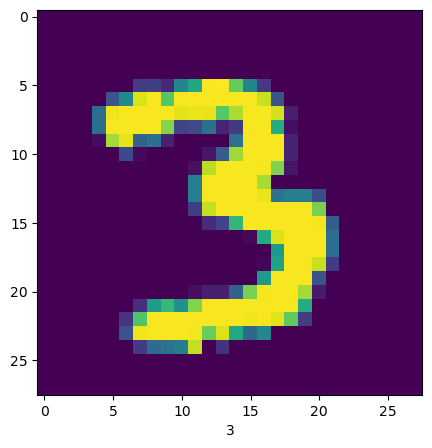

In [10]:
X_test_reshaped = x_test.T.values.reshape(-1, 28, 28)
plt.figure(figsize=(5, 5))
i = 500
print(d[i])
plt.imshow(X_test_reshaped[i])
plt.xlabel(m[i]);
